# CHM210 Assignment 3: Chemistry of Natural Waters, I

Welcome to the third assignment for CHM210. We are going to use a <a href="https://jupyter4edu.github.io/jupyter-edu-book/">Jupyter notebook</a> with Python to investigate some properties of natural waters and redox chemistry. All of your answers will be completed within this document (changes you make are saved into your personal https://utoronto.syzygy.ca account, so don't worry about editing this file). There are a lot of free, online resources out there to help you with Jupyter and Python. I recommend Christian Hill's <a href="https://scipython.com/book/">"Learning Scientific Programming with Python"</a>. The chemistry content of this assignment should follow your textbook and lecture notes (Chapter 10 in Baird and Cann, 5th edition).

After completing this assignment, you should be able to convert between absolute concentrations and mixing ratios in an aqueous environment (this is different than in the gas phase!), work with Henry's law constants, understand what is meant by thermal pollution, describe how the solubility of gases changes with temperature, calculate the pE for a given half reaction, and interpret a pE-pH diagram. You will also gain more familiarity with using Python to perform simple calculations.

First things first, we need to import the Python modules we will be using for this assignment. Press the "Run" button (or ctrl-enter) on the box below to import the packages we need. If done successfully, the "You have imported the above modules!" text will display below. 

## Importing Python modules

In [1]:
# lines that start with a "#" character are comments (Python doesn't treat them as code, but they are helpful for including explanations of why we have written code a particular way)
# the import statements are how we add the specific packages we want to use
# when we write "import YYYYYY as Y", we are creating a shortform "Y" that we can use to reference the package "YYYYYY"  
import matplotlib.pyplot as plt
import math as m
import numpy as np
import os

%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
# below is a simple print statement that will appear as text when we run this box of code
# you can easily change what text prints here by editing the words between the ""
print("You have imported the above modules!")

You have imported the above modules!


# Unit Conversions
If we want to talk about trace substances dissolved in water, we need to get comfortable with units. The "parts per" scale is commonly used here, but the meaning in the aqueous phase is different than the one we're now familiar  with in the gas phase.

When we talk about a mixing ratio of a solute in a solvent, we are talking about the ratio of the <b>mass of solute</b> to the <b>mass of solution</b>. This is different than in the gas-phase, where the mixing ratio was the ratio of the moles (or molecules) of a trace gas to the total moles (or molecules) of air.

Your textbook has a short discussion on pages 411-412 (5th edition) that will help you with these unit conversions.

Let's do an example together:
## For an aqueous solution, convert $0.04 \mu g$ $L^{-1}$ to ppm

First, recall that the mass of 1 L of natural water is approximately 1 kg (none of the dissolved gases or contaminants that we're discussing in this course appreciably change the density of the solution). There are several ways to approach these units conversions (depending on what units you choose to work in). This is one example.

In [2]:
# convert volume to mass of solution via density
density_solution = 1 # kg/L
volume_solution = 1 # L
mass_solution = density_solution*volume_solution
print("mass of solution = ",mass_solution,"kg")

mass of solution =  1 kg


So we know we have $0.04 \mu g$ of some solute in approximately $1 kg$ of solution. If we want the mixing ratio, we need common units.

In [3]:
# let's define our unit conversion
kg_to_µg = 1E9 #1x10^9 µg / 1kg
# and now we can convert our mass from kg to µg
mass_solution_µg = kg_to_µg * mass_solution
print("mass of solution = ",mass_solution_µg,"µg")

mass of solution =  1000000000.0 µg


Now that we have common units, we can arrive at a mixing ratio.

In [4]:
mass_solute_µg = 0.04 # µg
mixing_ratio = mass_solute_µg/mass_solution_µg
print("mixing ratio = ",mixing_ratio,"µg/µg")

mixing ratio =  4.0000000000000004e-11 µg/µg


This is a mixing ratio, but it's not on the "parts per million" (ppm) scale. The ppm scale means that we want to know the ratio of mass of solute to mass of solution if we had $10^6$ mass units of solution.
\begin{align}
\frac{\text{mass of solute}}{\text{mass of solution}} = \frac{x}{10^6}
\end{align}
We can simply see how to solve for $x$.

In [5]:
mixing_ratio_ppm = mixing_ratio*1E6
print("mixing ratio = ",mixing_ratio_ppm,"ppm")

mixing ratio =  4e-05 ppm


If we wanted to convert  this into ppb, we can do that too,

In [6]:
mixing_ratio_ppb = mixing_ratio*1E9
print("mixing ratio = ",mixing_ratio_ppb,"ppb")

mixing ratio =  0.04 ppb


0.04 ppb is an easier number to picture for most of us (and write down) than $4\times10^{-11}$, so the "parts per" scale is useful conceptually and when communicating this kind of information to others.


To answer the first question of the assignment, notice that the only thing different from our example is the mass of solute. Change the "ENTER_A_VALUE_HERE" text to the correct number to answer the question.

***
# Q1a. For an aqueous solution, convert $0.1 \mu g$ $L^{-1}$ to ppm <i>(1 mark)</i>
# Answer to Q1a :
***

In [7]:
mass_solute_Q1a_µg = .1 # µg
mixing_ratio_Q1a = mass_solute_Q1a_µg/mass_solution_µg
mixing_ratio_Q1a_ppm = mixing_ratio_Q1a*1E6
print("mixing ratio = ",mixing_ratio_Q1a_ppm,"ppm")

mixing ratio =  0.0001 ppm


***
# Q1b. For an aqueous solution, convert $0.1 \mu g$ $L^{-1}$ to ppb <i>(1 mark)</i>
# Answer to Q1b :
***

In [8]:
mixing_ratio_Q1b_ppb = mixing_ratio_Q1a*1E9
print("mixing ratio = ",mixing_ratio_Q1b_ppb,"ppb")

mixing ratio =  0.1 ppb


## ***
# Q1c. For an aqueous solution, convert $0.03 \mu g$ $g^{-1}$ to ppm <i>(2 marks)</i>
# Answer to Q1c :
***

In [9]:
# first identify the mass of solution (in g)
mass_solution_Q1c = 1  # g
# now write down the correct conversion ratio
g_to_µg = 1000000  #100,000 µg / 1g
# the mass of solution in ug can now be calculated
mass_solution_Q1c_µg = g_to_µg * mass_solution_Q1c
# now write down the mass of solute
mass_solute_Q1c_µg = .03  # µg
# this will calculate the mixing ratio of solute to solution
mixing_ratio_Q1c = mass_solute_Q1c_µg/mass_solution_Q1c_µg
# now convert from that ratio to ppm
mixing_ratio_Q1c_ppm = mixing_ratio_Q1c*1E6 
# print the answer
print("mixing ratio = ",round(mixing_ratio_Q1c_ppm,2),"ppm")

mixing ratio =  0.03 ppm


***
# Q1d. For an aqueous solution, convert $7 ppb$ to the $\mu g$ $L^{-1}$ scale <i>(2 marks)</i>
# Answer to Q1d :
***

In [10]:
# write down what we know (the mixing ratio in ppb)
mixing_ratio_Q1d_ppb = 7 # ppb

# now we'll work backwords. What's the mixing ratio in mass/mass?
mixing_ratio_Q1d = mixing_ratio_Q1d_ppb/1E9

# we also know the mass of solution
mass_solution_Q1d= 1000 #g
mass_solution_Q1d_µg = mass_solution_Q1d*g_to_µg #want in µg 

# so the mass of solute can be simple obtained
mass_solute_µg = mixing_ratio_Q1d*mass_solution_Q1d_µg
print("7 ppb = ",mass_solute_µg,"µg/L")

7 ppb =  7.0 µg/L


***
# Q1e. For an aqueous solution, convert $.05 ppm$ to the $mg$  $g^{-1}$ scale <i>(3 marks)</i>
# Answer to Q1e :
***

In [11]:
# write down what we know (the mixing ratio in ppb)
mixing_ratio_Q1e_ppm = 0.05 # ppm

# now we'll work backwords. What's the mixing ratio in mass/mass?
mixing_ratio_Q1e = mixing_ratio_Q1e_ppm/1E6

# we also know the mass of solution
mass_solution_Q1e= 1 #g
g_to_mg = 1000
mass_solution_Q1e_mg = mass_solution_Q1e*g_to_mg #want in mg 

# so the mass of solute can be simple obtained
mass_solute_µg_Q1e = mixing_ratio_Q1e*mass_solution_Q1e_mg
print("0.05 ppm = ",mass_solute_µg_Q1e ,"mg/g")

0.05 ppm =  5e-05 mg/g


An easy way to check that your code does what you think it does is by plugging in the numbers from the worked example above and making sure your answers agree.

# Solubility of Gases in Water
When a volatile compound is dissolved in water, at equilibrium, the Henry's law constant represents the ratio between the concentration in solution and the partial pressure in the atmosphere. This can be very helpful if we know how much of a compound is in one media and want to know how much would be in the other. 

Consider the example of benzene, $C_6 H_6$, presented on pages 412-413 in your textbook (Henry's Law constants were introduced on page 116-117 if you need to review).

At equilibrium,
\begin{align}
\left[C_6 H_6\right]=K_H P_{C_6 H_6}
\end{align}

Where $\left[C_6 H_6\right]$ is the concentration of benzene in water (typically in $mol/L$), $K_H$ is its Henry's Law constant, and $P_{C_6 H_6}$ is the partial pressure of benzene in the atmosphere.

## If the mixing ratio of benzene in water is about 1000 ppm, what is the partial pressure of benzene in the atmosphere above the water?

We know Henry's Law constants experimentally. In this case, $K_H = 0.18$ $mol$ $L^{-1}$ $atm^{-1}$. We need to convert 1000 ppm of benzene in water to a concentration in $mol/L$.

In [12]:
# we need to convert from mixing ratio (mass/mass) to concentration (mass/volume)
mixing_ratio_benzene_ppm = 1000 #ppm
# as before, we can work backwards to find the the mixing ratio in mass/mass
mixing_ratio_benzene = mixing_ratio_benzene_ppm/1E6
#g/L would be useful units to end on, we we want to know the mass of solution in g
mass_solution_g = 1000 #1 L = 1000g
mass_benzene = mixing_ratio_benzene*mass_solution_g
print("1000 ppm of benzene = ",mass_benzene,"g/L")

1000 ppm of benzene =  1.0 g/L


Now to convert $g/L$ into $mol/L$

In [13]:
# we need the molar mass of benzene
molar_mass_benzene = 78.12 # g mol^-1
volume_solution = 1 #L
# now the concentration in mol/L is given by
concentration_benzene = mass_benzene/molar_mass_benzene/volume_solution 
print("1000 ppm of benzene = ",round(concentration_benzene,3),"mol/L")

1000 ppm of benzene =  0.013 mol/L


Now we can calculate the partial pressure of benzene above water at equilibrium.

In [14]:
# we need to write the Henry's Law constant in a form Python can recognize
K_H_benzene = 0.18 # mol L^-1 atm^-1
# now we can calculate the partial pressure
P_benzene = concentration_benzene/K_H_benzene
print("partial pressure of benzene = ",round(P_benzene,2),"atm")

partial pressure of benzene =  0.07 atm


What if we want to know the atmospheric mixing ratio of benzene in ppbv (parts per billion by volume)? Recall that partial pressure is directly related in atmospheric mixing ratios,
\begin{align}
P_x = C_x \times P
\end{align}
Where $P_x$ is the partial pressure of a gas, $C_x$ is its atmospheric mixing ratio, and $P$ is the atmospheric pressure. 

In [15]:
# if we assume P = 1 atm
P_atmosphere = 1 # atm
# then the atmospheric mixing ratio is just... the ratio of partial pressure to pressure
mixing_ratio_benzene_atmosphere = P_benzene/P_atmosphere
# if we want this in ppb,
mixing_ratio_benzene_atmosphere_ppb = mixing_ratio_benzene_atmosphere*1E9
print("partial pressure of benzene = ",round(P_benzene,2),"atm which is the same as", round(mixing_ratio_benzene_atmosphere_ppb,0), "ppbv")

partial pressure of benzene =  0.07 atm which is the same as 71115663.0 ppbv


This is a very large number! Thankfully, the entire Earth's atmosphere is not at equilibirum with a water-body saturated in benzene, but large contamination events do occassionally occur, like the Deepwater Horizon spill in Gulf of Mexico in 2010, where extremely high pollution levels were detected in both the water and the atmosphere.


# Q2a. What is the solubility of $O_2$ in water at 25°C  (in units of $mg/L$)? <i>(2 marks)</i>
We know,
\begin{align} 
O_{2 (g)} <=> O_{2 (aq)}
\end{align}
And the Henry's law constant at 25°C is $K_H = 1.3 \times 10^{-3}$ $mol$ $L^{-1}$ $atm^{-1}$. The solublity will be the concentration of $O_2$ dissolved in water at equilibirum with the atmosphere.
# Answer to Q2a:
***

In [16]:
# we need to write the Henry's Law constant in a form Python can recognize
K_H_O2 = 1.3E-3 # mol L^-1 atm^-1
# and we already know the partial pressure of O2 in the (dry) atmosphere
P_O2 = 0.21
# so we can calculate the concentration of O2 in solution
concentration_O2 = K_H_O2*P_O2 # should be in mol/L
# now we hav ea concentration in mol/L but we want it in mg/L
molar_mass_oxygen_g = 32 # g mol^-1
molar_mass_oxygen_mg = molar_mass_oxygen_g*g_to_mg # mg mol^-1
# now we can convert to g/L
solubility_O2 = concentration_O2*molar_mass_oxygen_mg
print("Solubility of oxygen in water = ",round(solubility_O2,2),"mg/L")

Solubility of oxygen in water =  8.74 mg/L


# Q2b. What is the solubility of $O_2$ in water at 0°C  (in units of $mg/L$)? <i>(2 marks)</i>
The Henry's law constant at 0°C is $K_H =  $0.0022 $mol$ $L^{-1}$ $atm^{-1}$. 
# Answer to Q2b:

In [17]:
# we need to write the Henry's Law constant in a form Python can recognize
K_H_O2 = 0.0022 # mol L^-1 atm^-1
# so we can calculate the concentration of O2 in solution
concentration_O2 = K_H_O2*P_O2 # should be in mol/L
solubility_O2 = concentration_O2*molar_mass_oxygen_mg
print("Solubility of oxygen in water = ",round(solubility_O2,2),"mg/L")

Solubility of oxygen in water =  14.78 mg/L


# Q2c. What is the solubility of $CO_2$ in water at 25°C  (in units of $mg/L$)? <i>(2 marks)</i>
The Henry's law constant at 25°C is $K_H = 0.033 $ $mol$ $L^{-1}$ $atm^{-1}$. 
# Answer to Q2c:

In [18]:
# we need to write the Henry's Law constant in a form Python can recognize
K_H_CO2 = 0.033 # mol L^-1 atm^-1
# and we already know the partial pressure of CO2 in the (dry) atmosphere
P_CO2 = 400/1E6
# so we can calculate the concentration of CO2 in solution
concentration_CO2 = K_H_CO2*P_CO2 # should be in mol/L
# now we hav ea concentration in mol/L but we want it in mg/L
molar_mass_CO2_g = 44 # g mol^-1
molar_mass_CO2_mg = molar_mass_CO2_g*g_to_mg # mg mol^-1
# now we can convert to g/L
solubility_CO2 = concentration_CO2*molar_mass_CO2_mg
print("Solubility of CO2 in water = ",round(solubility_CO2,2),"mg/L")

Solubility of CO2 in water =  0.58 mg/L


# Q2d. What is the solubility of $CO_2$ in water at 0°C  (in units of $mg/L$)? <i>(1 mark)</i>
The Henry's law constant at 0°C is $K_H =  $0.076 $mol$ $L^{-1}$ $atm^{-1}$. 
# Answer to Q2d:

In [19]:
# we need to write the Henry's Law constant in a form Python can recognize
K_H_CO2 = 0.076 # mol L^-1 atm^-1

concentration_CO2 = K_H_CO2*P_CO2 # should be in mol/L
solubility_CO2 = concentration_CO2*molar_mass_CO2_mg
print("Solubility of CO2 in water = ",round(solubility_CO2,2),"mg/L")

Solubility of CO2 in water =  1.34 mg/L


# Q2e. Explain what is meant by "thermal pollution" and state two negative consequences of increasing global temperatures on aquatic life. <i>(3 marks)</i>
# Answer to Q2e:

Thermal pollution is when a natural body of water is warmed by some anthropogenic means. This is discussed on page 414 of your text book. 

Warmer water contains less dissolved oxygen because solubility of gases generally decreases with increasing temperatures. Many aquatic animals require dissolved oxygen to breath, so less dissolved oxygen can be detrimental to their survival.

Increased warming of waters can also exacerbate anaerobic conditions at the bottom of lakes and ponds, as warm water is less dense than cold water and thus floats above it leading to stratification (discussed on page 420 in your text). Lake stratification usually subsides in the fall/winter when cooler air temperatures cool the upper levels of the lake causing turnover, but warmer global temperatures can cause this process to happen later in the year, prolonging anaerobic conditions, potentially increasing microbial activity and upsetting nutrient availability in the water body as a whole.

Warmer water also has decreased oxidizing capacity relative to cold water as seen through the pE questions below, so pollutants are to be oxidized more slowly, allowing pollutants to potentially be found in greater concentrations in warmer waters (and the greater the concentration, the greater the potential for negative health outcomes for aquatic life).

There are many other acceptable answers here (changes to enzyme activity/metabolic rates/plant growth rates/food webs/migration patterns/etc.).


***
# The pE Scale
This material is covered in your text book on pages 424-430. It's worth carefully reading this section because the pE concept can be quite tricky.

pE is defined as the negative base 10 logarithm of the effective concentration (activity) of electrons in solution. This can be thought of analogously to pH, which characterizes proton availability. While pH is a measure of acidity, pE is a measure of reducing/oxidizing potential. Together these two quantities can help us predict what chemical species we should expect to find in natural waters.

We'll start off by going over an example together to see where the pE equation comes from, which may help you better apply this concept. Consider the half reaction for $O_2$ dissolved in water.
\begin{align}
\frac{1}{4}O_2 + H^+ + e^- <=> \frac{1}{2}H_2 O
\end{align}
We can write down the equilibirum constant for this reaction as,
\begin{align}
K_{eq} = \frac{1}{P^{\frac{1}{4}}_{O_2}\left[H^+\right]\left[e^-\right]}
\end{align}
And we have remembered that the activity of pure substances, in this case water, in the condensed phase is taken to be 1. The notation $[e^-]$ is imperfect (remember, there are no free electrons in solution), but we will use it because it is familar and will allow us to see where pE comes from. We can rearrange the above to solve for $[e^-]$,
\begin{align}
[e^-] = \frac{1}{P^{\frac{1}{4}}_{O_2}\left[H^+\right]K_{eq}}
\end{align}
Then if we take the negative logarithm of effective electron concentration (the definition of pE), we get,
\begin{align}
-\log[e^-] & = -\log\left(\frac{1}{P^{\frac{1}{4}}_{O_2}\left[H^+\right]K_{eq}}\right) \\
pE & = \log K_{eq} + \log\left(P^{\frac{1}{4}}_{O_2}\left[H^+\right] \right) \\
pE & = \log K_{eq} - pH + \frac{1}{4}\log P_{O_2}
\end{align}
This is a fairly simple looking expression, but arriving at the $K_{eq}$ for this half-reaction requires some knowledge of electrochemistry and the  Nernst Equation. This <a href="https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Supplemental_Modules_(Analytical_Chemistry)/Electrochemistry/Nernst_Equation">online reference is a helpful refresher</a>. If,
\begin{align}
\Delta G^\circ & = -2.303R T\log K_{eq} \\
 & = -n F E^\circ \\
\log K_{eq} & = \frac{n F E^\circ}{2.303R T}\\
\end{align}
Where $\Delta G^\circ$ is the change in Gibbs free energy under standard conditions, $R$ is the gas constant, $T$ is the temperature, $n$ is the number of electrons involved in the transfer, $F$ is the Faraday constant (96.5 KJ $mol^{-1}$), and $E^\circ$ is the standard cell potential difference. 

For the above reaction, n = 1, so the expression for pE is,
\begin{align}
pE & = \frac{F E^\circ}{2.303R T} - pH + \frac{1}{4}\log P_{O_2}
\end{align}

If T = 25°C,
\begin{align}
\log K_{eq} = \frac{E^\circ}{0.0591}
\end{align}
Thus, the expression for pE at 25°C is,
\begin{align}
pE & = \frac{E^\circ}{0.0591} - pH + \frac{1}{4}\log P_{O_2}
\end{align}
So for our half reaction, $\frac{1}{4}O_2 + H^+ + e^- <=> \frac{1}{2}H_2 O$, $E^\circ = 1.23V$, which means, at 25°C,
\begin{align}
pE & = 20.75 - pH + \frac{1}{4}\log P_{O_2}
\end{align}
As it appears on page 425 of your textbook!
## What is the pE value for pure water (pH = 7) at equilibrium with atmospheric $O_2$ if the temperature is 25°C?

In [20]:
# the standard cell potential difference (this is an experimental value one has to look up)
E_O2_standard = 1.229 # V
# gas constant (in useful units)
R = 8.314/1000 # kJ/mol K
# temperature (25°C in K)
T = 25 + 273.15 # K
# Faraday constant (in useful units
F = 96.5 # kJ mol-1
# assuming pH = 7
pH = 7
# partial pressure of O2
PO2 = 0.21
pE_O2 = E_O2_standard/(2.303*R*T/(F)) -pH + 1/4*m.log10(PO2)
print("The pE of neutral water saturated with O2 is", round(pE_O2,2))

The pE of neutral water saturated with O2 is 13.61


# Q3a. What is the pE value for pure water (pH = 7) at equilibrium with atmospheric $O_2$ if the temperature is 0°C? <i>(2 marks)</i>
# Answer to Q3a.
***

In [21]:
# the standard cell potential difference (this is an experimental value one has to look up)
# temperature (25°C in K)
T = 0 + 273.15 # K
pE_O2 = E_O2_standard/(2.303*R*T/(F)) -pH + 1/4*m.log10(PO2)
print("The pE of neutral water saturated with O2 is", round(pE_O2,2))

The pE of neutral water saturated with O2 is 15.51


# Q3b. Is the pE value you calculated for 0°C higher or lower than the one for 25°C? What does this tell us about the oxidizing/reducing capabilities of warm water vs cold water? <i>(2 marks)</i>

# Answer to Q3b.
***

The value is higher (pE = 15.5 for O°C while pE = 13.6 for 25°C). A higher value of pE tells us that colder water has a greater oxidizing capacity than warmer water. 

# Q3c. Derive the expression for pE at 25°C for the following half reaction: $Fe^{3+} + e^- <=> Fe^{2+}$ <i>(2 marks)</i>
# Answer to Q3c.
***


We can write down the equilibirum constant for this reaction as,
\begin{align}
K_{eq} = \frac{\left[Fe^{2+}\right]}{\left[Fe^{3+}\right]\left[e^-\right]}
\end{align}
Then we can rearrange the above to solve for $[e^-]$,
\begin{align}
[e^-] = \frac{\left[Fe^{2+}\right]}{\left[Fe^{3+}\right]K_{eq}}
\end{align}
Then if we take the negative logarithm of effective electron concentration (the definition of pE), we get,
\begin{align}
pE = -\log[e^-] & = -\log\left(\frac{\left[Fe^{2+}\right]}{\left[Fe^{3+}\right]K_{eq}}\right) \\
pE & = \log K_{eq} - \log\left(\frac{\left[Fe^{2+}\right]}{\left[Fe^{3+}\right]} \right) \\
\end{align}
Recall, $\log K_{eq} = \frac{n F E^\circ}{2.303R T}$. Since we are assuming $T$ = 25°C and we know n = 1, we can sub in our constants to get, 
\begin{align}
pE & = \frac{E^\circ}{0.0591} - \log\left(\frac{\left[Fe^{2+}\right]}{\left[Fe^{3+}\right]} \right)
\end{align}
This is the expression for pE at 25°C for the above system.

If we want the form in the text book (you don't have to do this though) , we can flip $\frac{\left[Fe^{2+}\right]}{\left[Fe^{3+}\right]}$, then we have,
\begin{align}
pE & = \frac{E^\circ}{0.0591} + \log\left(\frac{\left[Fe^{3+}\right]}{\left[Fe^{2+}\right]} \right)
\end{align}
If you were to substitute $E^\circ = +0.78 V$, you would get,
\begin{align}
pE & = 13.2 + \log\left(\frac{\left[Fe^{3+}\right]}{\left[Fe^{2+}\right]} \right)
\end{align}
This is the equation that appears on page 426.

# Q3d.  Write the complete, balanced, redox reaction for the oxidation of $NH_4^+$ to $NO_3^-$ (ie. for this unbalanced reaction  $NH_4^+ <=> NO^{-}_3$)<i> (2 marks)</i>
# Answer to Q3d.
***

$NH_4^+ + 3H_2O <=> NO^{-}_3 + 10H^+ + 8e^-$

How to get this answer:

$NH_4^+ <=> NO^{-}_3 $

Step 1. Determine the number of electrons involved in the process by balancing the change in oxidation number of $N$ atoms with electrons. The oxidation number of $N$ in $NH^+$ is -3 and the oxidation number of $N$ in $NO^-_3$ is 5, so we know this is an 8 electron process.

$NH_4^+  <=> NO^{-}_3 + 8e^-$

Step 2. Now we need to balance the charge by adding $H^+$ ($+1$ on the left and $-9$ on the right means we need to add $+10H^+$ to the right,

$NH_4^+ <=> NO^{-}_3 + 10H^+ + 8e^-$

Step 3. Balance the $O$ atoms by adding $H_2O$.

$NH_4^+ + 3H_2O <=> NO^{-}_3 + 10H^+ + 8e^-$

This system is discussed on pagees 428-430 of your text book. Review Appendix AP-1 in your text for a refresher on balancing redox reactions.

If we want to write this as a 1 electron process (you don't have to), we need to divide everything by 8
$\frac{1}{8}NH_4^+ + \frac{3}{8}H_2O <=> \frac{1}{8}NO^{-}_3 + \frac{5}{4}H^+ + e^-$



# Q3e. Derive the expression for pE at 25°C for the oxidation of $NH_4^+$ to $NO_3^-$ <i>(3 marks)</i>
# Answer to Q3e.
***


As above, we start off by writing down our $K_{eq}$
\begin{align}
K_{eq} = \frac{[NO^-_3][H^+]^{10}[e^-]^8}{[NH^+_4]}\\
\end{align}
Looking at $K_{eq}$ you might see why it can be nice to write expressions in terms of 1-electron processes, but it isn't required.
\begin{align}
[e^-]^8 = \frac{[NH^+_4]}{[NO^-_3][H^+]^{10}K_{eq}}\\
[e^-] = \frac{[NH^+_4]^{\frac{1}{8}}}{[NO^-_3]^{\frac{1}{8}}[H^+]^{\frac{10}{8}}K_{eq}^{\frac{1}{8}}}\\
\end{align}
Now we get our pE expression as before by taking $-\log[e^-]$
\begin{align}
pE = -\log[e^-] = -\log\left(\frac{[NH^+_4]^{\frac{1}{8}}}{[NO^-_3]^{\frac{1}{8}}[H^+]^{\frac{5}{4}}K_{eq}^{\frac{1}{8}}}\right)\\
\end{align}

Let's seperate the terms inside the log function,
\begin{align}
pE & = -\log\left(\frac{1}{K_{eq}^{\frac{1}{8}}}\right) -\log\left(\frac{1}{[H^+]^{\frac{5}{4}}}\right)  -\log\left(\frac{[NH^+_4]^{\frac{1}{8}}}{[NO^-_3]^{\frac{1}{8}}}\right) \\
& = +\log\left(K_{eq}^{\frac{1}{8}}\right) + \log\left([H^+]^{\frac{5}{4}}\right)  -\log\left(\frac{[NH^+_4]^{\frac{1}{8}}}{[NO^-_3]^{\frac{1}{8}}}\right) \\
& = \frac{1}{8}\log{K_{eq}} - \frac{5}{4}pH  -\frac{1}{8}\log\left(\frac{[NH^+_4]}{[NO^-_3]}\right)
\end{align}

Now when we go to this expression: $\log K_{eq} = \frac{n F E^\circ}{2.303R T}$ we have to remember n = 8, so at 25°C,
\begin{align}
pE & =  \frac{E^\circ}{0.0591} - \frac{5}{4}pH  -\frac{1}{8}\log\left(\frac{[NH^+_4]}{[NO^-_3]}\right)
\end{align}

***
# Using pE to predict what form a chemical species will be present in in natural waters
In extreme anaerobic waters, the pE can be determined by the ratio of methane ($CH_4$) to carbon dioxide ($CO_2$). This is represented through the half reaction,
\begin{align}
\frac{1}{8}CO_2 + H^+ + e^- <=> \frac{1}{8}CH_4 + \frac{1}{4}H_2O
\end{align}
where $E^\circ = +0.17 V$. At 25°C, the pE of this system will be given by (as seen on page 426 of your textbook),
\begin{align}
pE & = 2.87 - pH + \frac{1}{8}\log \frac{P_{CO_2}}{P_{CH_4}}
\end{align}
In general, we will need to know the temperature, pH, and the ratio of $P_{CO_2}$ to $P_{CH_4}$ to find the pE. Under highly anaerobic conditions, $\frac{P_{CO_2}}{P_{CH_4}} = 1$.

In [22]:
# the standard cell potential difference (this is an experimental value one has to look up)
E_CO2_CH4_standard = 0.17 # V
# gas constant (in useful units)
R = 8.314/1000 # kJ/mol K
# temperature (25°C in K)
T = 25 + 273.15 # K
# Faraday constant (in useful units
F = 96.5 # kJ mol-1
# assuming pH = 7
pH = 7
# ratio of partial pressures of CO2 to CH4
PCO2_PCH4 = 1 # PCO2/PCH4
pE_CO2_CH4 = E_CO2_CH4_standard/(2.303*R*T/(F)) - pH + 1/8*m.log10(PCO2_PCH4)
print("For this system, if T =", T, "K, pH = ",pH, ", and we have a PCO2:PCH4 ratio of ", PCO2_PCH4, ", pE =", round(pE_CO2_CH4,2))

For this system, if T = 298.15 K, pH =  7 , and we have a PCO2:PCH4 ratio of  1 , pE = -4.13


If now in this same system we have,
\begin{align}
Fe^{3+} + e^- <=> Fe^{2+}
\end{align}
Where $E^\circ = +0.78 V$, if the pE is being controlled by the $CO_2$:$CH_4$ half reaction because the molar abundance of $CO_2$ >> $Fe^{3+}$, then we can use the pE we calculated above to determine the ratio of $Fe^{3+}$:$Fe^{2+}$ present.

In [23]:
# the standard cell potential difference (this is an experimental value one has to look up)
E_Fe3_Fe2_standard = 0.78 # V

# log([Fe3+]/[Fe2+] = )
Fe3_Fe2 = 10**(pE_CO2_CH4 - E_Fe3_Fe2_standard/(2.303*R*T/(F)))
print("For this system, if T =", T, "K, pH = ",pH, ", then the [Fe3+]:[Fe2+] ratio is ", Fe3_Fe2)


For this system, if T = 298.15 K, pH =  7 , then the [Fe3+]:[Fe2+] ratio is  4.881826922415636e-18


This tells us that there is much, much more $Fe^{2+}$ present than $Fe^{3+}$ under these conditions.

If instead we consider the system under aerobic conditions, such that the $O_2$ half-reaction controls pE,

In [24]:
T = 25 + 273.15 # K
pE_O2 = E_O2_standard/(2.303*R*T/(F)) -pH + 1/4*m.log10(PO2)
# log([Fe3+]/[Fe2+] = )
Fe3_Fe2 = 10**(pE_O2 - E_Fe3_Fe2_standard/(2.303*R*T/(F)))
print("For this system, if T =", T, "K, pH = ",pH, ", then the [Fe3+]:[Fe2+] ratio is ", round(Fe3_Fe2,2))

For this system, if T = 298.15 K, pH =  7 , then the [Fe3+]:[Fe2+] ratio is  2.63


# Q4a. For 25°C, calulate the pE at which equal amounts of $Fe^{3+}$ and $Fe^{2+}$ will be present. <i>(2 marks)</i>
# Answer to Q4a.
***

In [25]:
# the standard cell potential difference (this is an experimental value one has to look up)
E_Fe3_Fe2_standard = 0.78 # V
# gas constant (in useful units)
R = 8.314/1000 # kJ/mol K
# temperature (25°C in K)
T = 25 + 273.15 # K
# Faraday constant (in useful units
F = 96.5 # kJ mol-1
# ratio of Fe3+ to Fe2+
FE3_FE2 = 1 
pE_FE3_FE2 = E_Fe3_Fe2_standard/(2.303*R*T/(F)) + m.log10(FE3_FE2)
print("For this system, if T =", T, "K, an equal ratio of Fe3+:Fe2+ occurs when pE = ", round(pE_FE3_FE2,2))

For this system, if T = 298.15 K, an equal ratio of Fe3+:Fe2+ occurs when pE =  13.19


***
The complete system is substantially more complicated when we consider the solids that are also involved in our equlibrium state. A simplified set of reactions is below:
\begin{align}
Fe^{3+} + e^- & <=> Fe^{2+} \\
Fe^{2+} + 2e^- & <=> Fe_{(s)} \\
Fe(OH)_{3(s)} + 3H^+ + e^- & <=> Fe^{2+} + 3H_{2}O \\
Fe(OH)_{3(s)} + H^+ + e^- & <=> Fe(OH)_{2(s)} + H_{2}O \\
Fe(OH)_{2(s)} + 2H^+ + 2e^- & <=> Fe_{(s)} + 2H_{2}O \\
2H_{2}O & <=> O_2 + 4H^+ + 4e^- \\
2H_{2}O + 2e^- & <=> H_2 + 2OH^- \\
\end{align}


We can generate the pE-pH diagram (also called a Pourbaix diagram) for the $Fe$-$O$-$H_2O$ system if the equilibrium constants for the above reactions are known. The code below will create a diagram like the one on page 427 in your textbook. <b>temp_C</b> defines the temperature in Celsius, <b>P_O2</b> the partial pressure of $O_2$, <b>P_H2</b>  the partial pressure of $H_2$, and <b>logConc_Fe</b> is the base10-logarithm for the molar concentration of iron in the system (ie. logConc_Fe = -6 means a concentration of $10^{-6} M$.

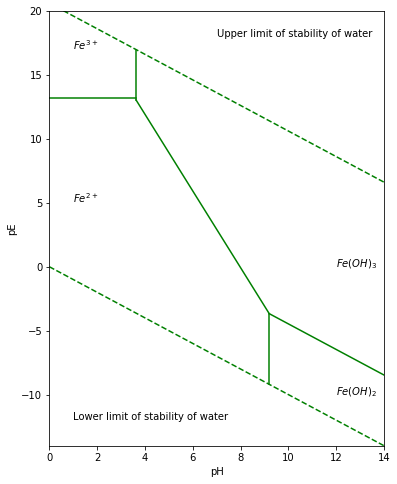

In [26]:
from chm210_3 import pEpHplot
pEpHplot(temp_C=25, P_O2=0.21, P_H2=1, logConc_Fe=-6)

# Q4b. Describe what (chemically) is occuring in the regions labelled "upper limit of stability of water" and "lower limit of stability of water". <i>(2 marks)</i>
# Answer to Q4b.
***

The regions labelled "upper/lower limit of stability of water" are the limits imposed on the system by the stability of water itself. Under extremely oxidizing conditions (upper limit), water will be oxidized $2H_2O <=> O_2 + 4H^+ + 4e^-$ and under extremely reducing conditions (lower limit) water will be reduced, $2H_2O + 2e^- <=> H_2 + 2OH^-$.

# Q4c. In an aerobic lake (pE controlled by the $\frac{1}{4}O_2 + H^+ + e^- <=> \frac{1}{2}H_2 O$ half reaction), at 25°C, neutral pH, and an Fe concentration of $10^{-6} M$, what form(s) of iron are we likely to find? <i>(1 mark)</i>
# Answer to Q4c.
***

Assuming pE = 13.61 and pH = 7, we would expect to find iron primarily in the form of $𝐹𝑒(𝑂𝐻)_{3(𝑠)}$.

# Q4d. In an anaerobic lake (pE controlled by the $\frac{1}{8}CO_2 + H^+ + e^- <=> \frac{1}{8}CH_4 + \frac{1}{4}H_2O$ half reaction), at 25°C, neutral pH, and an Fe concentration of $10^{-6} M$, what form(s) of iron are we likely to find? <i>(1 mark)</i>
# Answer to Q4d.
***

Assuming pE = -4.13 and pH = 7, we would expect to find iron primarily in the form of $𝐹𝑒^{2+}$.

***
When you have finished your assignment, you need to save it as a PDF and submit that PDF on Quercus. In your Jupyter Notebook, goto File --> Download ad --> PDF via LaTeX (.pdf)
<img src="http://individual.utoronto.ca/sck/CHM210/save2pdf.jpg">

If you have technical questions related to Python or Jupyter, contact Sarah Kavassalis (sarah.kavassalis@mail.utoronto.ca).
